In [1]:
# Import Libraries

from bs4 import BeautifulSoup
import requests
import time 
import datetime

import smtplib

In [19]:
# Connect to URL 

URL = 'https://www.amazon.ca/KitchenAid-KP26M1XER-Professional-6-Quart-Bowl-Lift/dp/B000P9CWNY/ref=sr_1_3?crid=15ZPRJ0HASZEO&keywords=kitchenaid+mixer&qid=1646896556&sprefix=%2Caps%2C87&sr=8-3'
# Get headers 

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
page = requests.get(URL, headers=headers)

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-ca"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.
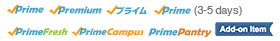

In [20]:
# Get the content (HTML page)

soup = BeautifulSoup(page.content, 'html.parser')
print(soup)

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-ca">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.sli
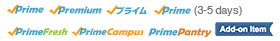

In [21]:
# Prettify - more readable formatting of HTML 

prettysoup = BeautifulSoup(soup.prettify(), 'html.parser')
print(prettysoup)

In [22]:
# Extract Product Title 

title = prettysoup.find(id='productTitle').get_text()
print(title)


     KitchenAid KP26M1XER Professional 600 Series 6-Quart Bowl-Lift Stand Mixer, Empire Red
    


In [23]:
# Extract Price 

price = prettysoup.find('span', 'a-offscreen').get_text()
print(price)


                        $599.98
                       


In [25]:
# Clean up the data 

price = price.strip()[1:]
title = title.strip()
print(title)
print(price)

KitchenAid KP26M1XER Professional 600 Series 6-Quart Bowl-Lift Stand Mixer, Empire Red
599.98


In [29]:
# Get the date 

import datetime

today = datetime.date.today()
print(today)

2022-03-10


In [30]:
# Create and write into a csv

import csv

header = ['Product', 'Price', 'Date']
data = [title, price, today]

with open('AmazonWebScraperDataset.csv', 'w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [31]:
# Check the data 

import pandas as pd

df = pd.read_csv('AmazonWebScraperDataset.csv')
df.head()

,Product,Price,Date
0,KitchenAid KP26M1XER Professional 600 Series 6...,599.98,2022-03-10


In [ ]:
# Now we need to append data to this csv - maybe add more products from my wishlist later!

with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

In [34]:
# Sending alerts to my email 

def sendEMail():
    server = smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.ehlo()
    #server.starttls()
    server.ehlo()
    server.login('nivi1622@gmail.com','xxxxxxxxxx')
    
    subject = "The KitchenAid Professional Mixer you want is below $400! Now is your chance to buy!"
    body = "Nivi, This is the moment we have been waiting for. Now is your chance to pick up the gorgeous KitchenAid of your dreams. Don't mess it up! Link here: https://www.amazon.ca/KitchenAid-KP26M1XER-Professional-6-Quart-Bowl-Lift/dp/B000P9CWNY/ref=sr_1_3?crid=15ZPRJ0HASZEO&keywords=kitchenaid+mixer&qid=1646896556&sprefix=%2Caps%2C87&sr=8-3"
   
    msg = f"Subject: {subject}\n\n{body}"
    
    server.sendmail(
        'nivi1622@gmail.com',
        msg
     
    )

In [39]:
# Now we can automate this into a method 

def checkPrice():
    # Connect to URL 

    URL = 'https://www.amazon.ca/KitchenAid-KP26M1XER-Professional-6-Quart-Bowl-Lift/dp/B000P9CWNY/ref=sr_1_3?crid=15ZPRJ0HASZEO&keywords=kitchenaid+mixer&qid=1646896556&sprefix=%2Caps%2C87&sr=8-3'
    
    # Get headers 

    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    page = requests.get(URL, headers=headers)
    
    # Get the content (HTML page)

    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Prettify - more readable formatting of HTML 

    prettysoup = BeautifulSoup(soup.prettify(), 'html.parser')
    
    # Extract Product Title 

    title = prettysoup.find(id='productTitle').get_text()
    
    # Extract Price 

    price = prettysoup.find('span', 'a-offscreen').get_text()
    
    # Clean up the data 

    price = price.strip()[1:]
    title = title.strip()
    
    # Get the date 

    import datetime

    today = datetime.date.today()
    
    # Create and write into a csv

    import csv

    header = ['Product', 'Price', 'Date']
    data = [title, price, today]
    
    # Now we need to append data to this csv - maybe add more products from my wishlist later!

    with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)
        
    if(price < '400'):
        sendEMail()
    

In [ ]:
# Put this into a timer so you can periodically check price

while(True):
    # Call the method
    checkPrice()
    # Set a sleep time - every n secs - eg: Check price every day!
    time.sleep(86400 )

# Have an awesome Black Friday! :D